### Classification
* Qualitative variables take on values in a unordered set 
    * $eye color \in {brown, blue, green}$
    * $email \in {spam, ham}$
* Given a feature vector X and a qualitative response $Y$ taking values in the set $C$, the classfication task is to build a function $C(X)$ that takes a feature vector $X$ as input and predicts its value for $Y$ i.e., $C(X) \in C$
* Often we are most interested in estimating the probabilities that $X$ belongs to each category $C$
    For ex: it is more valuable to have an estimate of the probability that an insurance claim is fraudulent, than a classification fraudulent or not. 




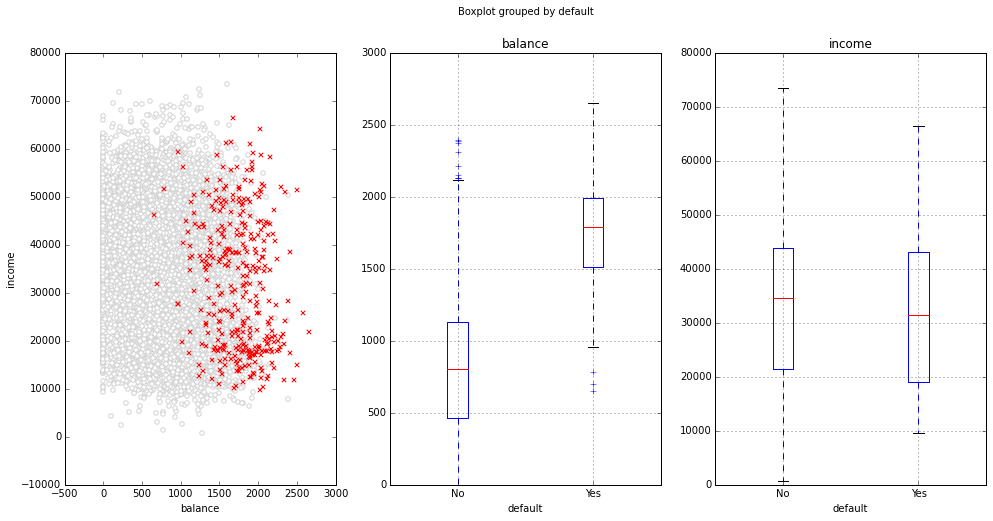

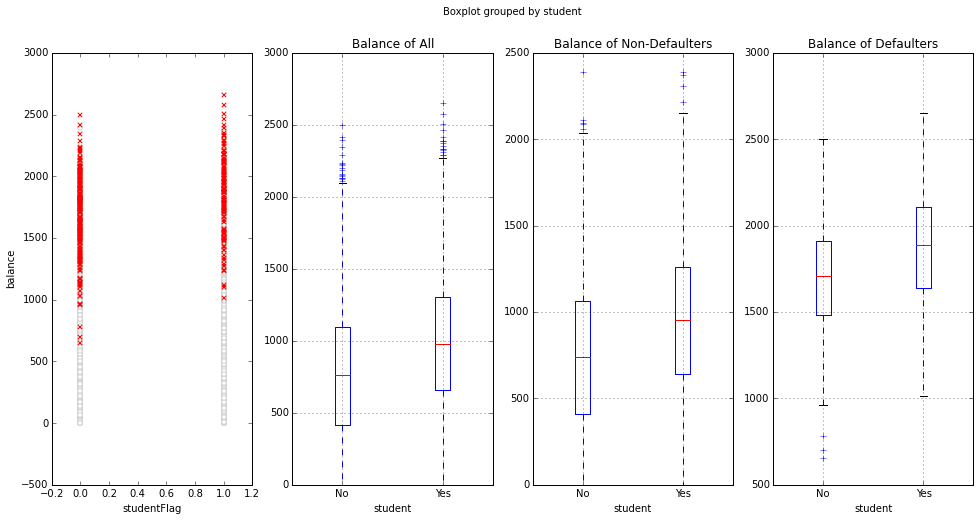

In [276]:
# Required Packages
%matplotlib inline
import itertools


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import linear_model
from prettytable import PrettyTable
data = pd.read_csv("data/Default.csv", delimiter=",", header=0)

data['studentFlag'] = data.apply (lambda row: createFlag(row,'student','Yes'),axis=1)

#print data
fig, axs = plt.subplots(1, 3, sharey=False)

default = data.loc[data['default'] == "Yes"]
n_default = data.loc[data['default'] == "No"]

#Red means credit default, Gray means no credit default
n_default.plot(kind='scatter', x='balance', y='income', ax=axs[0], figsize=(16, 8), edgecolor='lightgray',c='white', marker='o')
default.plot(kind='scatter', x='balance', y='income', ax=axs[0], figsize=(16, 8), edgecolor='red',c='white', marker='x')


dat = [np.random.normal(0,std,2) for std in range(1,6)]
#print dat

#plt.boxplot(dat, patch_artist=True)

data.boxplot('balance', by = 'default',ax=axs[1])
data.boxplot('income', by = 'default',ax=axs[2])


fig, axs = plt.subplots(1, 4, sharey=False)
n_default.plot(kind='scatter', y='balance', x='studentFlag', ax=axs[0], figsize=(16, 8), edgecolor='lightgray',c='white', marker='o')
default.plot(kind='scatter', y='balance', x='studentFlag', ax=axs[0], figsize=(16, 8), edgecolor='red',c='white', marker='x')

data.boxplot('balance', by = 'student',ax=axs[1])
axs[1].set_title("Balance of All")

n_default.boxplot('balance', by = 'student',ax=axs[2])
axs[2].set_title("Balance of Non-Defaulters")

default.boxplot('balance', by = 'student',ax=axs[3])
axs[3].set_title("Balance of Defaulters")


### Can we use Linear Regression

* Suppose for the $Default$ classification task that we code
    * $Y  \in  \{0,1\} \space\space 0\space if\space No,\space 1\space if\space Yes$
* Can we simply perform a linear regression of Y on X and classify as $Yes$ if $\hat Y > 0.5$?
    * In the case of a binary outcome, linear regression does a good job as a classfier, and is equivalent to $linear\space  discriminant \space analysis$ which is dicussed later.
    * Since in the population $E(Y|X = x) = Pr ( Y = 1 | X = x)$, we might think that regression is perfect for this task.
    * However, linear regression might produce probabilities less than zero or bigger than one. $Logistic \space Regression$ is more appropariate. 
    
Linear Vs. Logistic Regression
* For multi-value logistic regression, Linear Regression is not appropriate. _Multiclass Logistic Regression_ or _Discriminant Analysis_ are more appropriate

### Logistic Regression
Let's write $p(X) = Pr (Y = 1 | X )$ for short and consider using _balance_ to predict _default_. Logistic Regression uses the form 

$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1+ e^{\beta_0 + \beta_1X}}$

Using the monotone transformation a linear model can be fit to discrete values

$log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1X$

* log odds or logit model

### Maximum Likelihood 

* Maximum Likelihood to estimate parameters

$l (\beta_0, \beta) = \prod_{i:y_i=1} p(x_i) \prod_{i:y_i=0} (1-p(x_i))$

* The _likelihood_ gives the probability of of the observed zeroes and ones in the data. We pick \beta_0 and \beta_1 to maximize the likelihood of the observed data. 

* Most statistical packages can fit linear logistic regression models by maximum likelihood. 



In [279]:
from tabulate import tabulate

def createFlag(row, colName, trueVal):
    if row[colName] == trueVal:
        return 1
    else:
        return 0

def markSuccess(row, colName, threshold):
    #print row[colName] 
    if row[colName] >= threshold:
        return 1
    else:
        return 0

def printConfusion(df, actualCol, predCol):
    T_T = len(df[(df[actualCol]==1) & (df[predCol]==1)])
    T_F = len(df[(df[actualCol]==1) & (df[predCol]==0)])
    F_T = len(df[(df[actualCol]==0) & (df[predCol]==1)])
    F_F = len(df[(df[actualCol]==0) & (df[predCol]==0)])
    print 'Predicted Values'
    t = PrettyTable(['Actual','False', 'True'])
    #t.add_row(['Actual','False', 'True'])
    t.add_row(['False',F_F, F_T])
    t.add_row(['True',T_F, T_T])
    #print t
    
    
'''
def logR(x,y):
    x['Intercept'] = 1
    xDat = [[x]]
    yDat = y
    print yDat
    logReg = sm.Logit(yDat, xDat)
    return logReg.fit()
'''
#Create dummy variable indicating Default
data['defaultFlag'] = data.apply (lambda row: createFlag(row,'default','Yes'),axis=1)
data['Intercept'] = 1

#Fit model for balance
m_data = data[['Intercept','balance']]
logit = sm.Logit(data['defaultFlag'], m_data)
result = logit.fit()
print result.summary()

thresh = 0.5
m_data['predicted'] = result.predict(m_data)
m_data['predicted_mod'] = m_data.apply( lambda row: markSuccess(row,'predicted',thresh),axis =1)
m_data['actual'] = pd.Series(data['defaultFlag'], index = m_data.index)
print m_data.head()
printConfusion(m_data, 'actual','predicted_mod')
#Learning (a) balance is significant

#Fit model for student status
data['studentFlag'] = data.apply (lambda row: createFlag(row,'student','Yes'),axis=1)
m_data = data[['Intercept','studentFlag']]
logit = sm.Logit(data['defaultFlag'], m_data)
result = logit.fit()
print result.summary()
#Learning (a) studentFlag is significant, (b)studentFlag has a positive co-efficient

#Fit model for income
m_data = data[['Intercept','income']]
logit = sm.Logit(data['defaultFlag'], m_data)
result = logit.fit()
print result.summary()
#Learning (a) income is significant

#Fit model with all variables
m_data = data[['Intercept','balance', 'income', 'studentFlag']]
logit = sm.Logit(data['defaultFlag'], m_data)
result = logit.fit()
print result.summary()
#Learning (a) income is not significant (b) studentFlag co-efficient is negative

#Fit model with balance and student status 
m_data = data[['Intercept','balance', 'studentFlag']]
logit = sm.Logit(data['defaultFlag'], m_data)
result = logit.fit()
print result.summary()
#Learning (a) studentFlag co-efficient is negative



C:\Python27\lib\site-packages\ipykernel\__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            defaultFlag   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Dec 2015   Pseudo R-squ.:                  0.4534
Time:                        21:39:02   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000       -11.359    -9.943
balance        0.0055      0

C:\Python27\lib\site-packages\ipykernel\__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Example: South African Heart Disease
* 160 cases of myocardial infarction and 302 controls (all male in age range 15-64), from Western Cape, South Africa in early 80s. 
* Overall prevalence very high in this region: 5.1%
* Measurements of 7 risk factors
* Goal is to identify relative strengths of risk factors, and directions of risk factor impact
* Data was collected as part of an intervention study aimed at educating the public on healthier diets


In [170]:
heartData = pd.read_csv("data/Heart.csv", delimiter=",", header=0)
print 'Heart data has', len(heartData)-1,'entries. Below is a snapshot of the dataset:'
heartData.head()


Heart data has 302 entries. Below is a snapshot of the dataset:


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


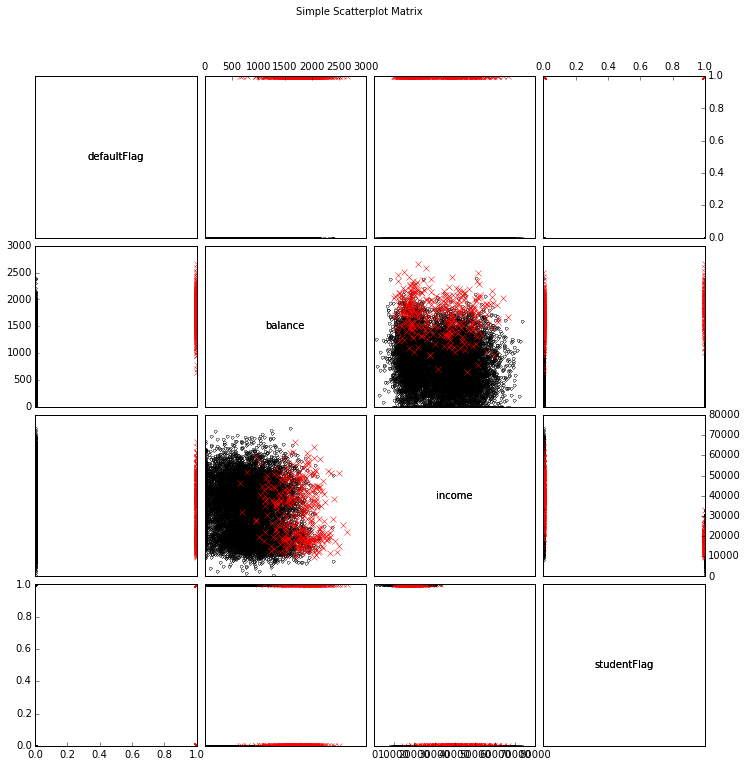

In [258]:
def scatterPlotMatrix(data, flagCol):
    #groups = data.groupby('defaultFlag')
    #clrs = ['grey','red']
    #for group in groups:
    #    print group[0]
    #    data = group[1]
    fig = scatterplot_matrix(data,data.columns.values, linestyle='none',  mfc='none')
    fig.suptitle('Simple Scatterplot Matrix')
    plt.show()

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numdata, numvars = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    groups = data.groupby('defaultFlag')
    clrs = ['black','red']
    mkrs = ['.','x']
    for group in groups:
        #print group[0]
        clr = clrs[group[0]]
        mkr = mkrs[group[0]]
        data = group[1]
        for ax in axes.flat:
            # Hide all ticks and labels
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

            # Set up ticks only on one side for the "edge" subplots...
            if ax.is_first_col():
                ax.yaxis.set_ticks_position('left')
            if ax.is_last_col():
                ax.yaxis.set_ticks_position('right')
            if ax.is_first_row():
                ax.xaxis.set_ticks_position('top')
            if ax.is_last_row():
                ax.xaxis.set_ticks_position('bottom')
        # Plot the data.
        for i, j in zip(*np.triu_indices_from(axes, k=1)):
            #print i,j
            for x, y in [(i,j), (j,i)]:
                axes[x,y].plot(data[[y]], data[[x]],color = clr, marker=mkr,**kwargs)

        # Label the diagonal subplots...
        for i, label in enumerate(names):
            axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center')

        # Turn on the proper x or y axes ticks.
        for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
            axes[j,i].xaxis.set_visible(True)
            axes[i,j].yaxis.set_visible(True)
    return fig

scatDat = data[['defaultFlag','balance', 'income', 'studentFlag']]

#fig, axs = plt.subplots(1, 2, sharey=False)
#default = scatDat.loc[data['defaultFlag'] == 1]
#n_default = scatDat.loc[data['defaultFlag'] == 2]

scatterPlotMatrix(scatDat, 'defaultFlag')

#scatterPlotMatrix(scatDat, 'grey')

### Case-control sampling and logistic regression
* In South African data, there are 160 cases, 302 controls - $\hat\pi = 0.35$ are cases. Yet the prevalence of MI in this region is $\pi = 0.05$
* With case-control samples, we can estimate the regression parameters $\beta_j$ accurately (if the model is correct); the constant term $\beta_0$ is incorrect. 
* We can correct the estimated intercept by a simple transformation
    * $\hat\beta_0^* = \hat\beta_0 + log\left(\frac{\pi}{1-\pi}\right) - log\left(\frac{\hat\pi}{1-\hat\pi}\right)$
* Often cases are rare and we take them all; up to five times that number of the controls is sufficient